In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import glob
import re
from scipy.stats import norm

# Access data per year and make correlations between

Smartphone vs icome correlation per year

2021: r = 0.124, n = 262670
2022: r = 0.114, n = 265325
2023: r = 0.107, n = 269956


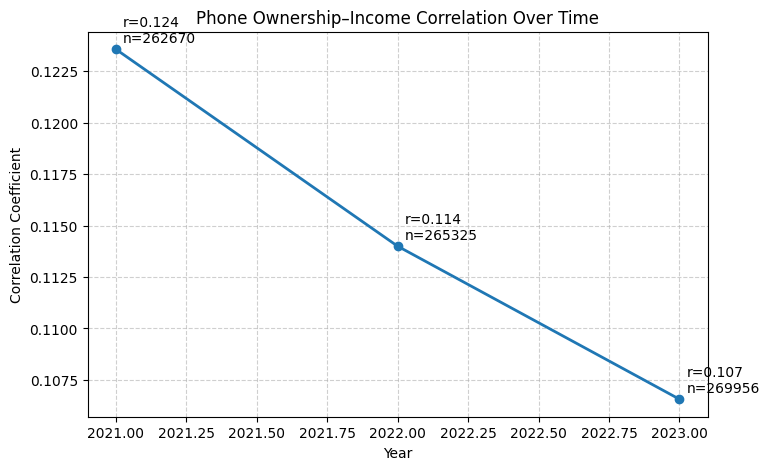

In [11]:
files = sorted(glob.glob("data*.csv"))
year_stats = []

for file in files:
    m = re.search(r'(20\d{2})', file)
    year = int(m.group(1))

    df = pd.read_csv(file)

    #change smartphone to be 0 or 1 not True or False
    if df['smartphone'].dtype == object:
        mapping = {True:1,
                   False:0}
        df['smartphone'] = df['smartphone'].astype(str).str.lower().map(mapping)

    df['smartphone'] = pd.to_numeric(df['smartphone'], errors='coerce')
    df['household_income'] = pd.to_numeric(df['household_income'], errors='coerce')

    df = df.dropna(subset=['smartphone', 'household_income'])
    n = len(df)

    r = df['smartphone'].corr(df['household_income'])
    year_stats.append((year, r, n))
    print(f"{year}: r = {r:.3f}, n = {n}")

corr_df = pd.DataFrame(year_stats, columns=['year','correlation','n']).sort_values('year')

#plot the results
plt.figure(figsize=(8,5))
plt.plot(corr_df['year'], corr_df['correlation'], marker='o', linewidth=2)
for _, row in corr_df.iterrows():
    plt.annotate(f"r={row['correlation']:.3f}\nn={int(row['n'])}",
                 (row['year'], row['correlation']), xytext=(5,5), textcoords='offset points')
plt.title('Phone Ownership–Income Correlation Over Time')
plt.xlabel('Year'); plt.ylabel('Correlation Coefficient')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

Test the correlation between 2021 and 2023 to see if its statistically significant

In [12]:
def fisher_z(r):
    return 0.5 * np.log((1 + r) / (1 - r))

r1, r2 = corr_df.loc[corr_df['year']==2021, 'correlation'].values[0], corr_df.loc[corr_df['year']==2023, 'correlation'].values[0]
n1, n2 = len(pd.read_csv('data2021.csv')), len(pd.read_csv('data2023.csv'))

z1, z2 = fisher_z(r1), fisher_z(r2)
z = (z1 - z2) / np.sqrt(1/(n1 - 3) + 1/(n2 - 3))
p_value = 2 * (1 - norm.cdf(abs(z)))

print(f"Z = {z:.3f}, p = {p_value:.10f}")

Z = 6.292, p = 0.0000000003


Test the same thing but for age - income

['data2021.csv', 'data2022.csv', 'data2023.csv']
2021: correlation = -0.078
2022: correlation = -0.078
2023: correlation = -0.089


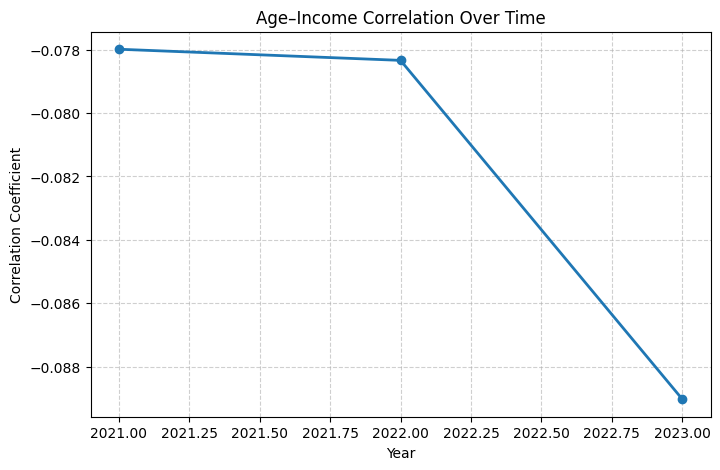

In [13]:
#find files
files = glob.glob("data*.csv")
print(files)

year_corr = []

for file in files:
    #get years
    year = int(re.search(r'(\d{4})', file).group(1))
    #read in the file
    df = pd.read_csv(file)
    
    # make sure columns are numeric
    df['age'] = pd.to_numeric(df['age'], errors='coerce')
    df['income'] = pd.to_numeric(df['household_income'], errors='coerce')
    
    # drop nas
    df = df.dropna(subset=['age', 'household_income'])
    
    # find correlations
    corr = df['age'].corr(df['household_income'])
    
    year_corr.append((year, corr))
    print(f"{year}: correlation = {corr:.3f}")

#create df
corr_df = pd.DataFrame(year_corr, columns=['year', 'correlation']).sort_values('year')

# make plot to show change
plt.figure(figsize=(8,5))
plt.plot(corr_df['year'], corr_df['correlation'], marker='o', linewidth=2)
plt.title('Age–Income Correlation Over Time')
plt.xlabel('Year')
plt.ylabel('Correlation Coefficient')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()


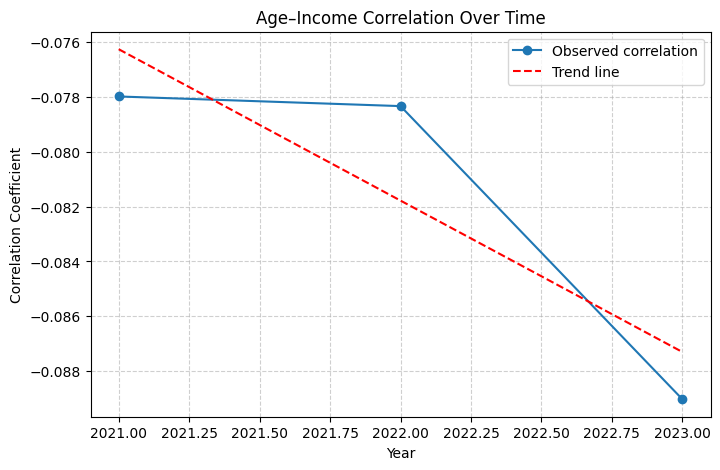

In [14]:
# put a trend line on
z = np.polyfit(corr_df['year'], corr_df['correlation'], 1)
p = np.poly1d(z)

plt.figure(figsize=(8,5))
plt.plot(corr_df['year'], corr_df['correlation'], 'o-', label='Observed correlation')
plt.plot(corr_df['year'], p(corr_df['year']), 'r--', label='Trend line')
plt.title('Age–Income Correlation Over Time')
plt.xlabel('Year')
plt.ylabel('Correlation Coefficient')
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()
plt.show()


In [15]:
def fisher_z(r):
    return 0.5 * np.log((1 + r) / (1 - r))

r1, r2 = corr_df.loc[corr_df['year']==2021, 'correlation'].values[0], corr_df.loc[corr_df['year']==2023, 'correlation'].values[0]
n1, n2 = len(pd.read_csv('data2021.csv')), len(pd.read_csv('data2023.csv'))

z1, z2 = fisher_z(r1), fisher_z(r2)
z = (z1 - z2) / np.sqrt(1/(n1 - 3) + 1/(n2 - 3))
p_value = 2 * (1 - norm.cdf(abs(z)))

print(f"Z = {z:.3f}, p = {p_value:.6f}")


Z = 4.055, p = 0.000050
